# Importación de datos



(siempre ejecutar la primera celda después de iniciar el notebook para que funcionen las demás)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from folium.plugins import HeatMap
from IPython.display import display
from matplotlib.ticker import FuncFormatter
import folium

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



Objetivo:En este primer análisis, debes calcular el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.

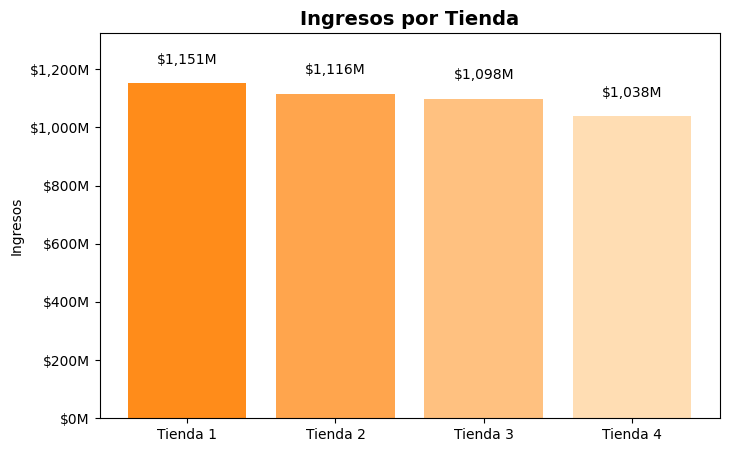

In [ ]:
# Calcular ingresos totales por tienda
ingreso_tienda1 = tienda1['Precio'].sum()
ingreso_tienda2 = tienda2['Precio'].sum()
ingreso_tienda3 = tienda3['Precio'].sum()
ingreso_tienda4 = tienda4['Precio'].sum()

# Definir datos y colores para la gráfica
nombres = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ingresos_totales = [ingreso_tienda1, ingreso_tienda2, ingreso_tienda3, ingreso_tienda4]
bar_colors = ['#ff8c1a', '#ffa54d', '#ffc180', '#ffddb3']

# Función para formatear números a millones
def millones(x, pos=None):
    """
    Esta función convierte un número y le da formato de millones (M) sin decimales
    """
    if pd.isna(x) or x == 0:
      return '$0M'
    return f'${x/1_000_000:,.0f}M'

# Crear la figura y los ejes para la gráfica
fig, ax = plt.subplots(figsize=(8, 5))

# Crear el gráfico de barras
ax.bar(nombres, ingresos_totales, color=bar_colors)

# Aplicar el formato de millones al eje y
ax.yaxis.set_major_formatter(FuncFormatter(millones))

# Poner el título a la gráfica
ax.set_title("Ingresos por Tienda", fontsize=14, fontweight='bold')
ax.set_ylabel("Ingresos")

# Añadir etiquetas de valor encima de cada barra
for i, v in enumerate(ingresos_totales):
    if not pd.isna(v):                                                                    # Solo añadir texto si el valor no es nulo/NaN
        ax.text(i,                                                                        # Posición x (centro de la barra)
                v + max(ingresos_totales) * 0.05,                                         # Posición y (un poco encima de la barra)
                millones(v),                                                              # El texto a mostrar (formateado)
                ha='center',                                                              # Alineación horizontal
                va='bottom',                                                              # Alineación vertical
                fontsize=10,                                                              # Tamaño del texto
                bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 2, 'edgecolor': 'none'}) # Caja alrededor del texto

# Ajustar los límites del eje y para dar espacio a las etiquetas
if ingresos_totales and not all(pd.isna(x) for x in ingresos_totales if isinstance(x, (int, float))):
    ax.set_ylim(0, max(ingresos_totales) * 1.15)
else:
    ax.set_ylim(0, 1)

# Mostrar la gráfica
plt.show()

Notas del Análisis de facturación:


-Ingresos Totales:


La facturación combinada de las cuatro tiendas asciende aproximadamente a $4,403 Millones de dolares (suma de USD 1,151M + USD 1,116M + USD 1,098M + USD 1,038M)


-Ranking por Tienda basado en ingreso generado:


1°)Tienda 1: Lidera con aprox. USD 1,151M

2°)Tienda 2: Sigue con aprox. USD 1,116M

3°)Tienda 3: Ocupa el tercer lugar con aprox. USD 1,098M

4°)Tienda 4: Registra los menores ingresos con aprox. USD 1,038M


-Diferencias Notables:


Aunque todas las tiendas superan los USD 1 Millón en ingresos, la diferencia entre la tienda de mayor rendimiento, la Tienda 1 y la de menor rendimiento, la Tienda 4 es significativa, alcanzando aproximadamente USD 113 Millones. Las Tiendas 2 y 3 presentan ingresos bastante similares entre sí

# 2. Ventas por categoría

Objetivo:En este debes calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

--- Conteo Categorías Tienda 1 --- 
 Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171

--- Conteo Categorías Tienda 2 --- 
 Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181

--- Conteo Categorías Tienda 3 --- 
 Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177

--- Conteo Categorías Tienda 4 --- 
 Categoría del Producto
Muebles      

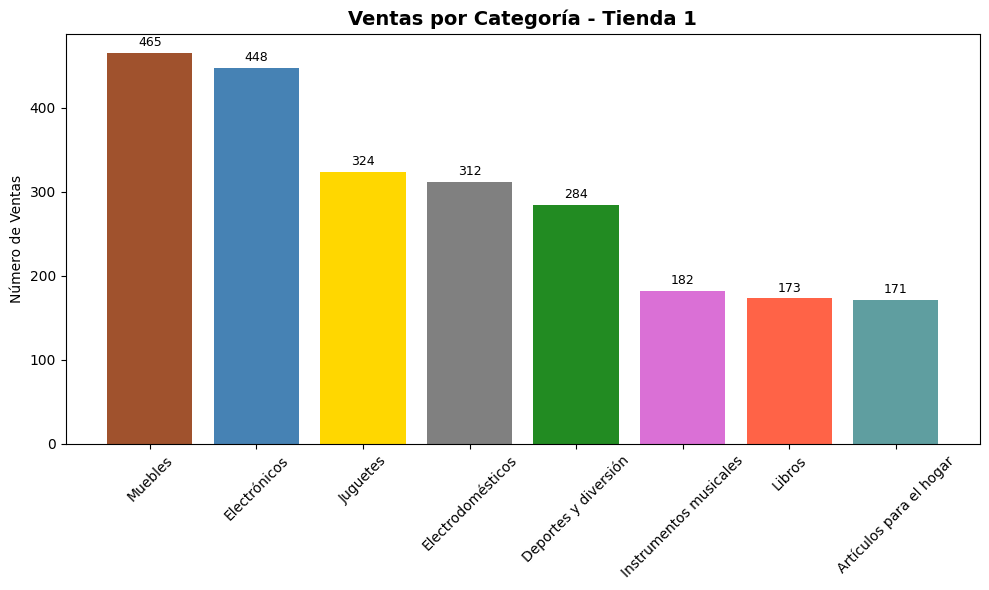

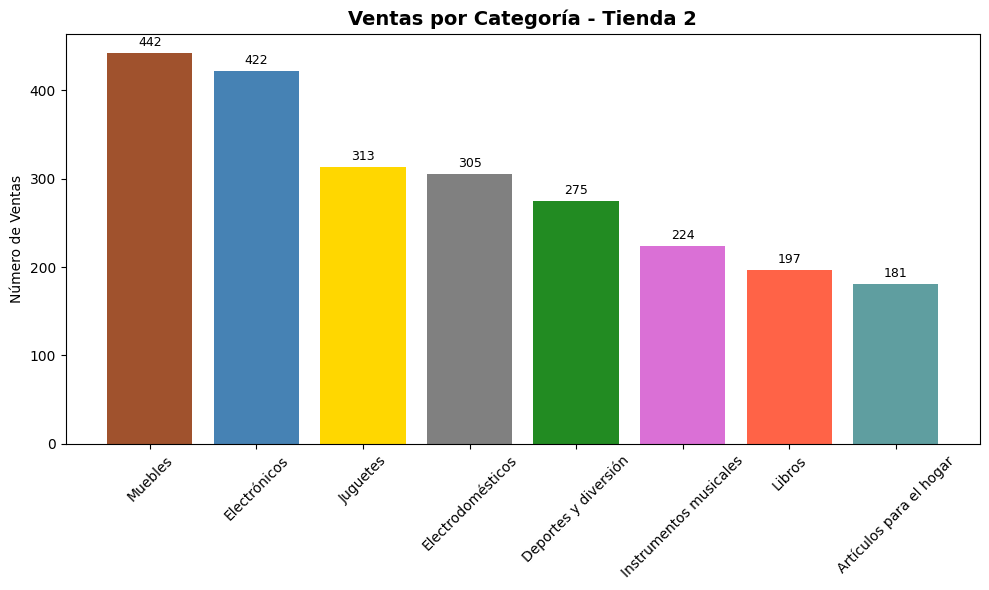

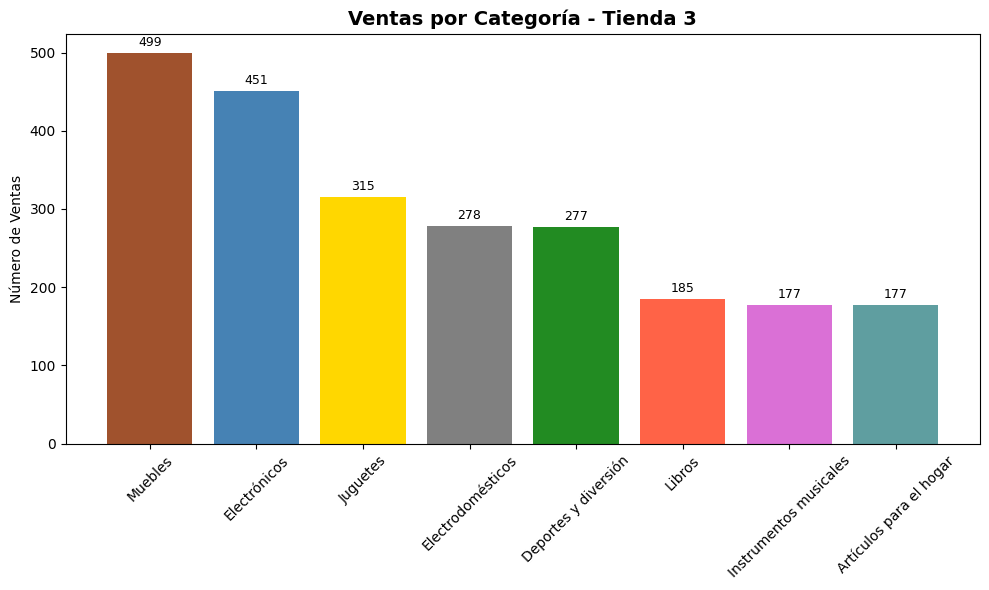

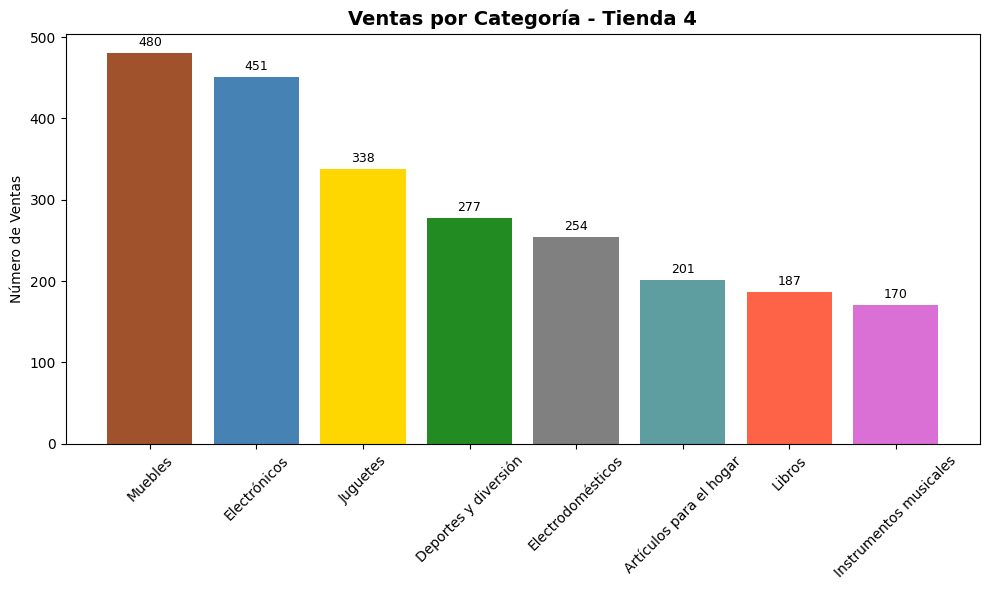

In [ ]:
# Calcular el conteo de ventas por categoría para cada tienda
conteo_cat_tienda1 = tienda1['Categoría del Producto'].value_counts()
conteo_cat_tienda2 = tienda2['Categoría del Producto'].value_counts()
conteo_cat_tienda3 = tienda3['Categoría del Producto'].value_counts()
conteo_cat_tienda4 = tienda4['Categoría del Producto'].value_counts()

# Puedes descomentar las siguientes líneas si quieres ver los conteos en la consola
print("--- Conteo Categorías Tienda 1 --- \n", conteo_cat_tienda1.to_string())
print("\n--- Conteo Categorías Tienda 2 --- \n", conteo_cat_tienda2.to_string())
print("\n--- Conteo Categorías Tienda 3 --- \n", conteo_cat_tienda3.to_string())
print("\n--- Conteo Categorías Tienda 4 --- \n", conteo_cat_tienda4.to_string())


# Gráfico tienda 1

# 1. Seleccionar los datos de la tienda a graficar
datos_grafica = conteo_cat_tienda1
categorias = datos_grafica.index.tolist()
conteos = datos_grafica.values.tolist()

# 2. Definir colores
color_map = {
    'Muebles': '#A0522D',
    'Electrónicos': '#4682B4',
    'Juguetes': '#FFD700',
    'Electrodomésticos': '#808080',
    'Deportes y diversión': '#228B22',
    'Instrumentos musicales': '#DA70D6',
    'Libros': '#FF6347',
    'Artículos para el hogar': '#5F9EA0'
}
default_color = '#CCCCCC'
num_categorias = len(categorias)
colores_categorias = [color_map.get(cat, default_color) for cat in categorias]

# 3. Crear la figura y los ejes
fig_cat, ax_cat = plt.subplots(figsize=(10, 6))

# 4. Crear el gráfico de barras
ax_cat.bar(categorias, conteos, color=colores_categorias)

# 5. Aplicar formato y títulos
print(" ")
ax_cat.set_title("Ventas por Categoría - Tienda 1", fontsize=14, fontweight='bold')
ax_cat.set_ylabel("Número de Ventas")
ax_cat.tick_params(axis='x', rotation=45)
plt.tight_layout()

# 6. Añadir etiquetas de valor
for i, v in enumerate(conteos):
    if v > 0:
        ax_cat.text(i, v + max(conteos)*0.01, str(v), ha='center', va='bottom', fontsize=9)

# 7. Mostrar la gráfica
plt.show()


# Gráfico tienda 2

# 1. Seleccionar los datos de la tienda a graficar
datos_grafica = conteo_cat_tienda2
categorias = datos_grafica.index.tolist()
conteos = datos_grafica.values.tolist()

# 2. Definir colores
color_map = {
    'Muebles': '#A0522D',
    'Electrónicos': '#4682B4',
    'Juguetes': '#FFD700',
    'Electrodomésticos': '#808080',
    'Deportes y diversión': '#228B22',
    'Instrumentos musicales': '#DA70D6',
    'Libros': '#FF6347',
    'Artículos para el hogar': '#5F9EA0'
}
default_color = '#CCCCCC'
num_categorias = len(categorias)
colores_categorias = [color_map.get(cat, default_color) for cat in categorias]

# 3. Crear la figura y los ejes
fig_cat, ax_cat = plt.subplots(figsize=(10, 6))

# 4. Crear el gráfico de barras
ax_cat.bar(categorias, conteos, color=colores_categorias)

# 5. Aplicar formato y títulos
print(" ")
ax_cat.set_title("Ventas por Categoría - Tienda 2", fontsize=14, fontweight='bold')
ax_cat.set_ylabel("Número de Ventas")
ax_cat.tick_params(axis='x', rotation=45)
plt.tight_layout()

# 6. Añadir etiquetas de valor
for i, v in enumerate(conteos):
    if v > 0:
        ax_cat.text(i, v + max(conteos)*0.01, str(v), ha='center', va='bottom', fontsize=9)

# 7. Mostrar la gráfica
plt.show()


# Gráfico tienda 3

# 1. Seleccionar los datos de la tienda a graficar
datos_grafica = conteo_cat_tienda3
categorias = datos_grafica.index.tolist()
conteos = datos_grafica.values.tolist()

# 2. Definir colores
color_map = {
    'Muebles': '#A0522D',
    'Electrónicos': '#4682B4',
    'Juguetes': '#FFD700',
    'Electrodomésticos': '#808080',
    'Deportes y diversión': '#228B22',
    'Instrumentos musicales': '#DA70D6',
    'Libros': '#FF6347',
    'Artículos para el hogar': '#5F9EA0'
}
default_color = '#CCCCCC'
num_categorias = len(categorias)
colores_categorias = [color_map.get(cat, default_color) for cat in categorias]

# 3. Crear la figura y los ejes
fig_cat, ax_cat = plt.subplots(figsize=(10, 6))

# 4. Crear el gráfico de barras
ax_cat.bar(categorias, conteos, color=colores_categorias)

# 5. Aplicar formato y títulos
print(" ")
ax_cat.set_title("Ventas por Categoría - Tienda 3", fontsize=14, fontweight='bold')
ax_cat.set_ylabel("Número de Ventas")
ax_cat.tick_params(axis='x', rotation=45)
plt.tight_layout()

# 6. Añadir etiquetas de valor
for i, v in enumerate(conteos):
    if v > 0:
        ax_cat.text(i, v + max(conteos)*0.01, str(v), ha='center', va='bottom', fontsize=9)

# 7. Mostrar la gráfica
plt.show()


# Gráfico tienda 4

# 1. Seleccionar los datos de la tienda a graficar
datos_grafica = conteo_cat_tienda4
categorias = datos_grafica.index.tolist()
conteos = datos_grafica.values.tolist()

# 2. Definir colores
color_map = {
    'Muebles': '#A0522D',
    'Electrónicos': '#4682B4',
    'Juguetes': '#FFD700',
    'Electrodomésticos': '#808080',
    'Deportes y diversión': '#228B22',
    'Instrumentos musicales': '#DA70D6',
    'Libros': '#FF6347',
    'Artículos para el hogar': '#5F9EA0'
}
default_color = '#CCCCCC'
num_categorias = len(categorias)
colores_categorias = [color_map.get(cat, default_color) for cat in categorias]

# 3. Crear la figura y los ejes
fig_cat, ax_cat = plt.subplots(figsize=(10, 6))

# 4. Crear el gráfico de barras
ax_cat.bar(categorias, conteos, color=colores_categorias)

# 5. Aplicar formato y títulos
print(" ")
ax_cat.set_title("Ventas por Categoría - Tienda 4", fontsize=14, fontweight='bold')
ax_cat.set_ylabel("Número de Ventas")
ax_cat.tick_params(axis='x', rotation=45)
plt.tight_layout()

# 6. Añadir etiquetas de valor
for i, v in enumerate(conteos):
    if v > 0:
        ax_cat.text(i, v + max(conteos)*0.01, str(v), ha='center', va='bottom', fontsize=9)

# 7. Mostrar la gráfica
plt.show()

Notas de las Ventas por categoría:


-Ventas Totales:


El número total de ventas acumuladas en las cuatro tiendas, sumando todas las categorías, es de 9,435 unidades


-Ranking por Categoría basado en las ventas generadas:


1°) Muebles: Lidera con un total de 1,886 ventas

2°) Electrónicos: Sigue con 1,772 ventas

3°) Juguetes: Ocupa el tercer lugar con 1,290 ventas

4°) Electrodomésticos: Registra 1,149 ventas

5°) Deportes y diversión: Suma 1,113 ventas

6°) Instrumentos musicales: Alcanza 753 ventas

7°) Libros: Llega a 742 ventas

8°) Artículos para el hogar: Cierra la lista con 730 ventas


-Diferencias Notables:


Las categorías "Muebles", "Electrónicos" y "Juguetes" son consistentemente las más populares en términos de números de ventas en las cuatro tiendas, ocupando los tres primeros lugares respectivamente en todas ellas. El patrón de igualdad de los puestos se rompe a causa de la Tienda 4, ya que en el cuarto lugar en ventas es la única tienda que no tiene "Electrodomésticos" sino "Deportes y diversión", en consecuencia la Tienda 4 es también la única tienda que tiene en el quinto lugar en ventas "Electrodomésticos" en vez de "Deportes y diversión". Para el sexto lugar en ventas las tiendas 1 y 2 tienen la categoría de "Instrumentos musicales", mientras que en las tiendas 3 y 4 tienen "Libros" y "Articulos para el hogar" respectivamente, en el séptimo lugar en ventas las tiendas 1 y 2 tienen la categoría de "Libros", mientras que en las tiendas 3 y 4 tienen "Instrumentos musicales" y "Libros" respectivamente, ya en el último lugar en ventas las tiendas 1, 2 y 3 tienen la categoría de "Articulos para el hogar", mientras que en la Tienda 4 rompe el patrón de igualdad en los puestos por última vez teniendo la categoría de "Instrumentos musicales"

# 3. Calificación promedio de la tienda


Objetivo:En este paso, debes calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

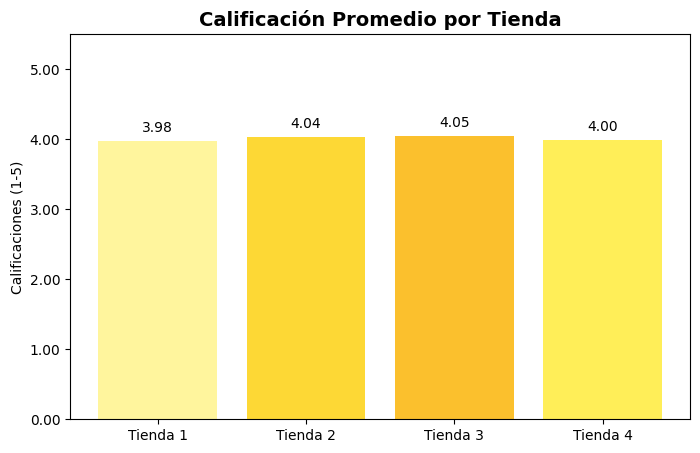

In [ ]:
# Calcular la calificación promedio para cada tienda
try:
    calificacion_prom_tienda1 = tienda1['Calificación'].mean()
    calificacion_prom_tienda2 = tienda2['Calificación'].mean()
    calificacion_prom_tienda3 = tienda3['Calificación'].mean()
    calificacion_prom_tienda4 = tienda4['Calificación'].mean()
except KeyError:
    print("Error: Verifica que la columna 'Calificación' exista en todos los DataFrames.")
    # Asignar NaN o 0 si falla para que el código no se detenga
    calificacion_prom_tienda1 = pd.NA
    calificacion_prom_tienda2 = pd.NA
    calificacion_prom_tienda3 = pd.NA
    calificacion_prom_tienda4 = pd.NA
except TypeError:
    print("Error: Verifica que la columna 'Calificación' sea numérica.")
    # Asignar NaN o 0 si falla
    calificacion_prom_tienda1 = pd.NA
    calificacion_prom_tienda2 = pd.NA
    calificacion_prom_tienda3 = pd.NA
    calificacion_prom_tienda4 = pd.NA

# Definir datos y colores para la gráfica de calificaciones
nombres = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
calificaciones_promedio = [calificacion_prom_tienda1, calificacion_prom_tienda2, calificacion_prom_tienda3, calificacion_prom_tienda4]

# 1. Combinar nombres, calificaciones y su índice original (0, 1, 2, 3)
datos_combinados = []
for i, calif in enumerate(calificaciones_promedio):
    if pd.notna(calif) and isinstance(calif, (int, float)):
        datos_combinados.append((nombres[i], calif, i))
# 2. Ordenar los datos combinados por calificación (de mayor a menor)
datos_ordenados = sorted(datos_combinados, key=lambda item: item[1], reverse=True)
# 3. Definir la paleta base de colores (oscuro a claro)
colores_base = ['#fbc02d', '#fdd835', '#ffee58', '#fff59d']
# 4. Crear un mapeo desde el índice original de la tienda al color que le corresponde por ranking
colores_mapeados = {}
num_validos = len(datos_ordenados)
for rank, (nombre, calif, original_index) in enumerate(datos_ordenados):
    if rank < len(colores_base):
      colores_mapeados[original_index] = colores_base[rank]
    else:
      colores_mapeados[original_index] = colores_base[-1]
# 5. Crear la lista final de colores en el orden original de las tiendas
bar_colors_calif = [colores_mapeados.get(i, '#CCCCCC') for i in range(len(nombres))]

# Función para formatear números
def format_rating(x, pos=None):
    return f'{x:.2f}'

# Crear la figura y los ejes para la gráfica
fig_calif, ax_calif = plt.subplots(figsize=(8, 5))

# Crear el gráfico de barras
valid_indices = [i for i, x in enumerate(calificaciones_promedio) if pd.notna(x)]
nombres_validos = [nombres[i] for i in valid_indices]
calif_validas = [calificaciones_promedio[i] for i in valid_indices]
colores_validos = [bar_colors_calif[i] for i in valid_indices]
if nombres_validos:
  ax_calif.bar(nombres_validos, calif_validas, color=colores_validos)
else:
  ax_calif.text(0.5, 0.5, 'Sin datos de calificación válidos', horizontalalignment='center', verticalalignment='center', transform=ax_calif.transAxes)

# Aplicar formato de calificación al eje y
ax_calif.yaxis.set_major_formatter(FuncFormatter(format_rating))

# Poner el título a la gráfica
ax_calif.set_title("Calificación Promedio por Tienda", fontsize=14, fontweight='bold')
ax_calif.set_ylabel("Calificaciones (1-5)")

# Añadir etiquetas de valor encima de cada barra
if calif_validas:
    max_calif = max(calif_validas) if calif_validas else 5
    for i, v in enumerate(calif_validas):
        texto_etiqueta = f'{v:.2f}'
        ax_calif.text(i,                    # Posición x (centro de la barra)
                      v + max_calif * 0.02, # Posición y (un poco encima de la barra)
                      texto_etiqueta,       # El texto formateado
                      ha='center',          # Alineación horizontal
                      va='bottom',          # Alineación vertical
                      fontsize=10)          # Tamaño del texto

# Ajustar los límites del eje y
ax_calif.set_ylim(0, 5.5)

# Mostrar la gráfica
plt.show()

Notas de la Calificación promedio de la tienda:


-Calificaciones Totales:


La calificación promedio general, considerando las cuatro tiendas, es de aproximadamente 4.02 puntos (promedio de 3.98, 4.04, 4.05 y 4.00)


-Ranking por Tienda basado en calificación promedio:


1°) Tienda 3: Lidera con una calificación promedio de 4.05 puntos

2°) Tienda 2: Sigue muy de cerca con 4.04 puntos

3°) Tienda 4: Ocupa el tercer lugar con 4.00 puntos

4°) Tienda 1: Registra la menor calificación promedio con 3.98 puntos


-Diferencias Notables:


Las calificaciones promedio entre las tiendas son extremadamente similares, todas rondando los 4.0 puntos sobre 5. La diferencia entre la tienda con la calificación más alta, la Tienda 3 y la más baja, la Tienda 1 es mínima (solo 0.07 puntos). Esto sugiere un nivel de satisfacción del cliente bastante homogéneo y generalmente positivo en las cuatro tiendas

# 4. Productos más y menos vendidos

Objetivo:En este paso, debes identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.

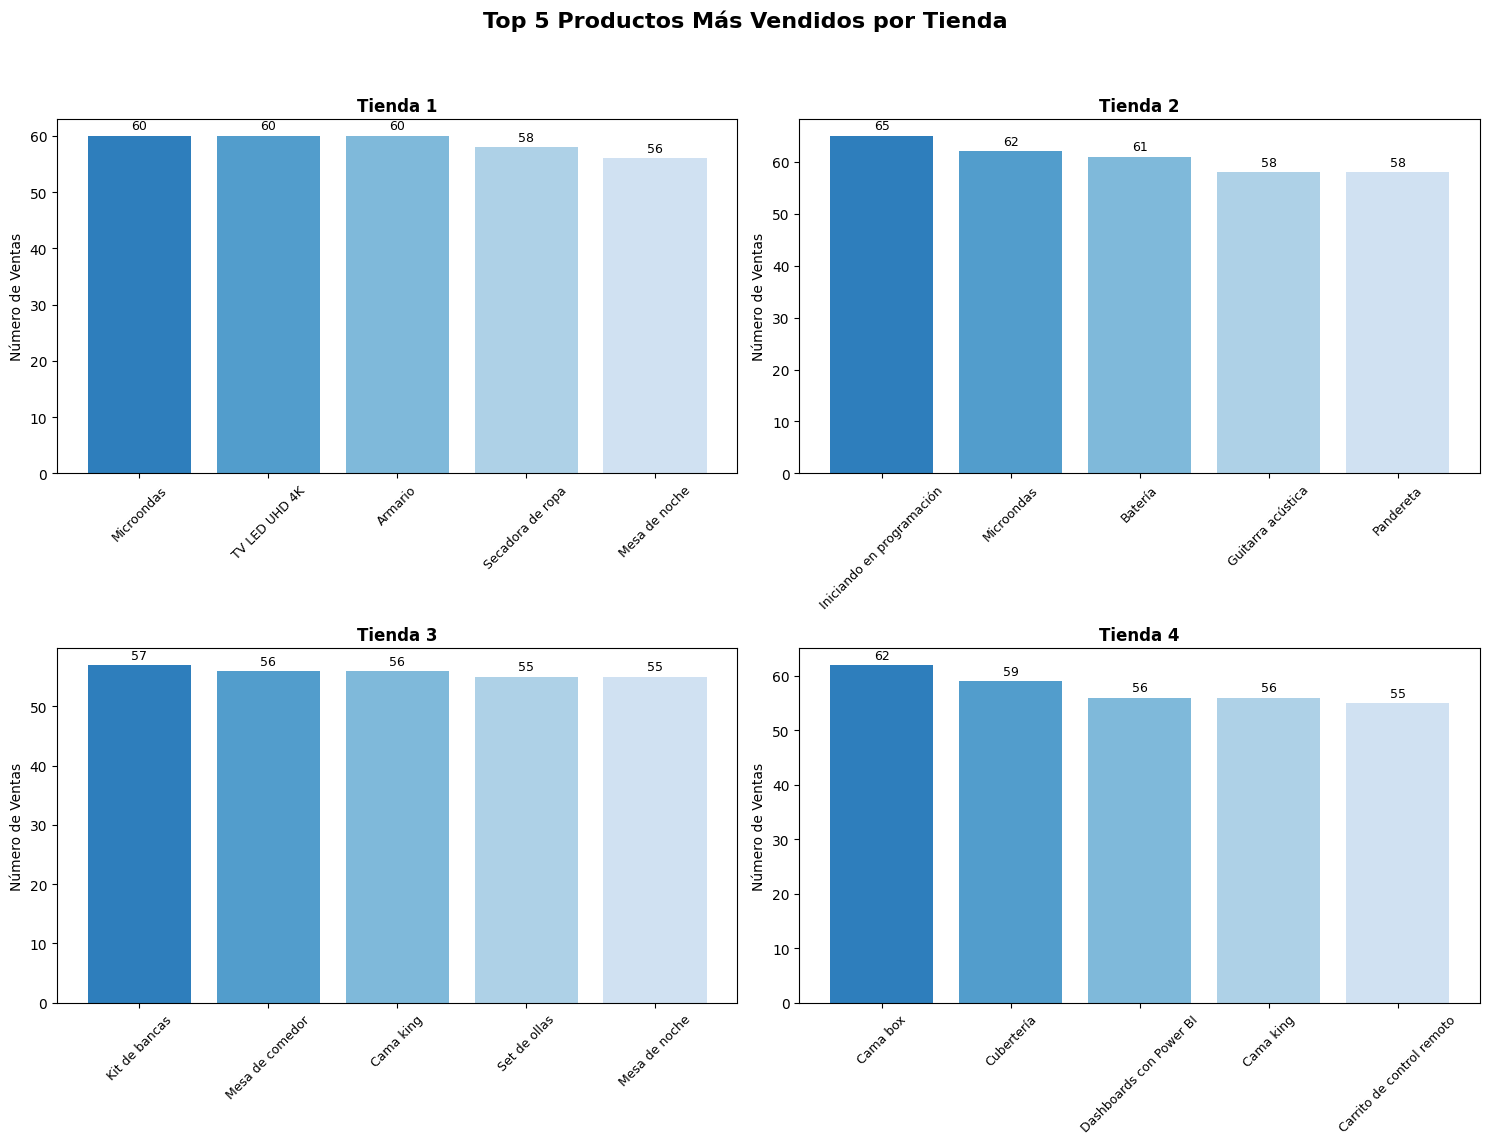

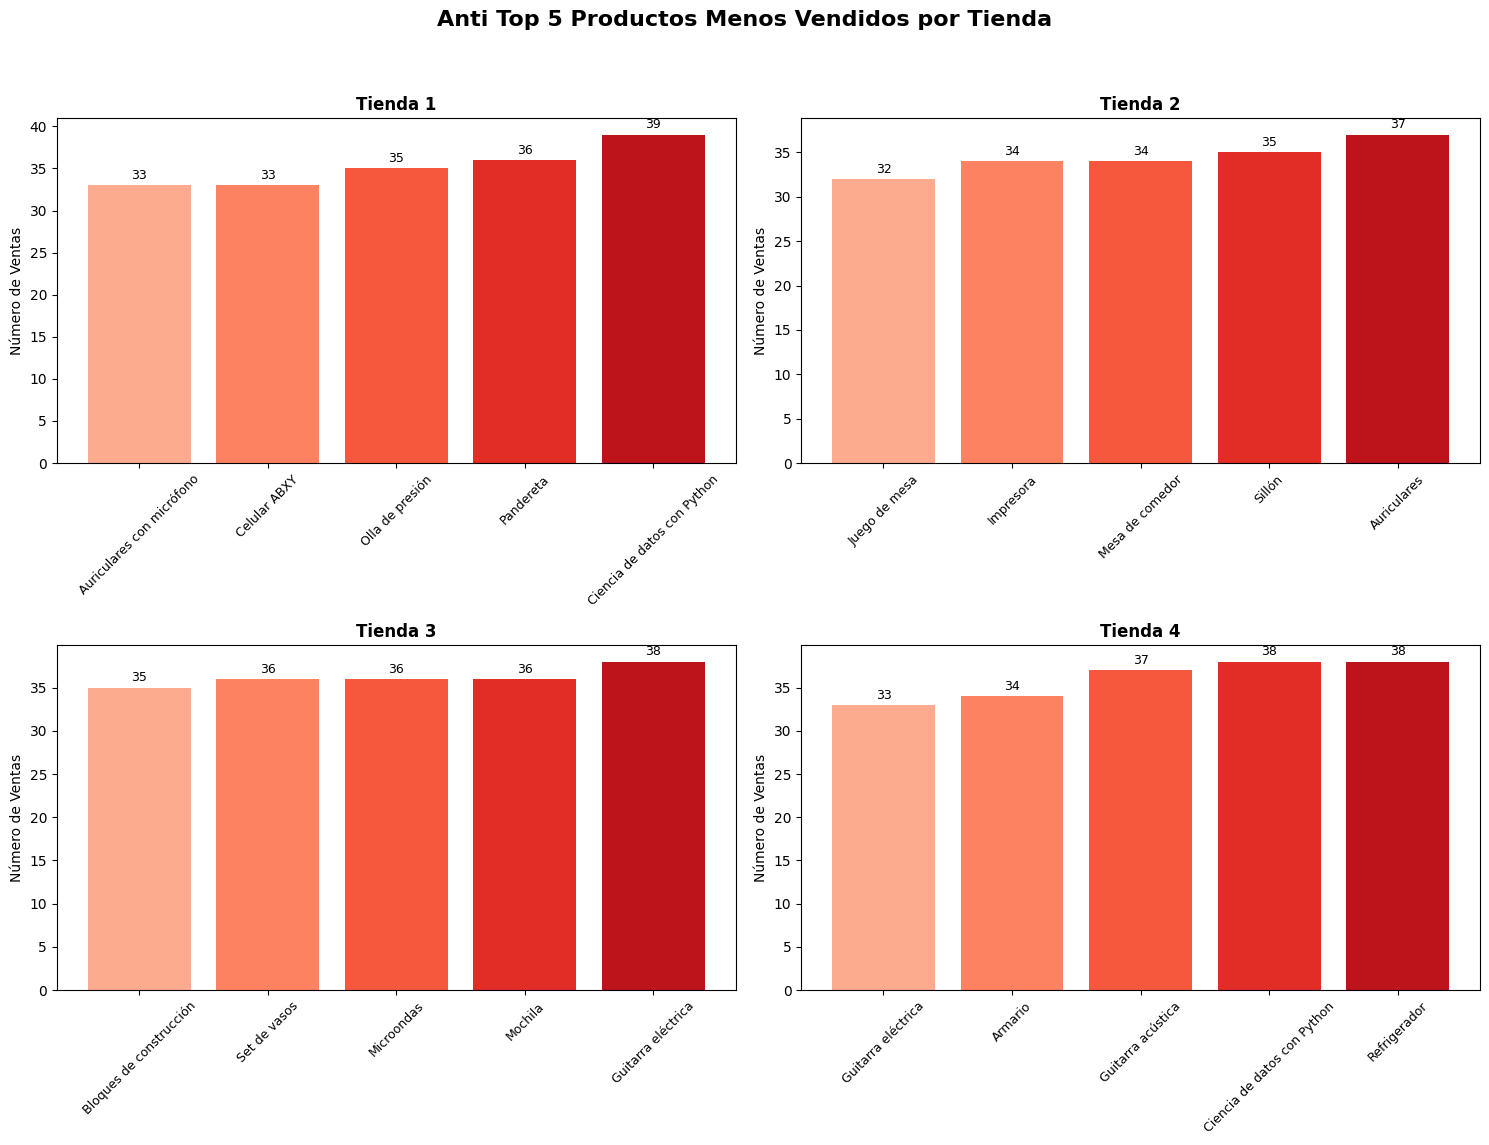

In [ ]:
# Calcular el conteo de ventas para cada producto en cada tienda
prod_counts_t1 = tienda1['Producto'].value_counts()
prod_counts_t2 = tienda2['Producto'].value_counts()
prod_counts_t3 = tienda3['Producto'].value_counts()
prod_counts_t4 = tienda4['Producto'].value_counts()


# Preparación de datos para gráficos

# 1. Extraer top 5
top5_t1 = prod_counts_t1.head(5)
top5_t2 = prod_counts_t2.head(5)
top5_t3 = prod_counts_t3.head(5)
top5_t4 = prod_counts_t4.head(5)

# 2. Extraer anti-top 5
bottom5_t1 = prod_counts_t1.tail(5).sort_values(ascending=True)
bottom5_t2 = prod_counts_t2.tail(5).sort_values(ascending=True)
bottom5_t3 = prod_counts_t3.tail(5).sort_values(ascending=True)
bottom5_t4 = prod_counts_t4.tail(5).sort_values(ascending=True)

# 3. Crear listas para iterar fácilmente en los bucles de gráficos
top5_list = [top5_t1, top5_t2, top5_t3, top5_t4]
bottom5_list = [bottom5_t1, bottom5_t2, bottom5_t3, bottom5_t4]
store_names = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']


# Visualización top 5 productos por tienda

# 1. Crear figura y ejes para top 5
fig_top, axs_top = plt.subplots(2, 2, figsize=(15, 12))
fig_top.suptitle('Top 5 Productos Más Vendidos por Tienda', fontsize=16, fontweight='bold')
axes_top_flat = axs_top.flatten()

# 2. Bucle para dibujar gráficos top 5
for i, ax in enumerate(axes_top_flat):

    # 2.1 Seleccionar datos top 5 de la tienda actual
    datos_grafica = top5_list[i]
    productos = datos_grafica.index.tolist()
    conteos = datos_grafica.values.tolist()

    # 2.2 Verificar si hay datos
    if not productos:
        ax.text(0.5, 0.5, 'Sin datos', ha='center', va='center', transform=ax.transAxes)
        ax.set_title(f'{store_names[i]}', fontsize=12)
        continue

    # 2.3 Definir colores
    num_productos = len(productos)
    colores = plt.cm.Blues_r(np.linspace(0.3, 0.8, num_productos))

    # 2.4 Crear gráfico de barras
    ax.bar(productos, conteos, color=colores)

    # 2.5 Aplicar formato y títulos
    ax.set_title(f'{store_names[i]}', fontsize=12, fontweight='bold')
    ax.set_ylabel("Número de Ventas")
    ax.tick_params(axis='x', rotation=45, labelsize=9)

    # 2.6 Añadir etiquetas de valor
    if conteos:
        max_conteo = max(conteos)
        for j, v in enumerate(conteos):
            if v > 0:
                ax.text(j, v + max_conteo*0.01, str(v), ha='center', va='bottom', fontsize=9)

# 3. Ajustar diseño general top 5
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# 4. Mostrar gráfica top 5
plt.show()


# Visualización anti-top 5 productos por tienda

# 1. Crear figura y ejes para anti-top 5
fig_bottom, axs_bottom = plt.subplots(2, 2, figsize=(15, 12))
fig_bottom.suptitle('Anti Top 5 Productos Menos Vendidos por Tienda', fontsize=16, fontweight='bold')
axes_bottom_flat = axs_bottom.flatten()

# 2. Bucle para dibujar gráficos anti-top 5
for i, ax in enumerate(axes_bottom_flat):

    # 2.1 Seleccionar datos anti-top 5 de la tienda actual
    datos_grafica = bottom5_list[i]
    productos = datos_grafica.index.tolist()
    conteos = datos_grafica.values.tolist()

    # 2.2 Verificar si hay datos
    if not productos:
        ax.text(0.5, 0.5, 'Sin datos', ha='center', va='center', transform=ax.transAxes)
        ax.set_title(f'{store_names[i]}', fontsize=12)
        continue

    # 2.3 Definir colores
    num_productos = len(productos)
    colores = plt.cm.Reds(np.linspace(0.3, 0.8, num_productos))

    # 2.4 Crear gráfico de barras
    ax.bar(productos, conteos, color=colores)

    # 2.5 Aplicar formato y títulos
    ax.set_title(f'{store_names[i]}', fontsize=12, fontweight='bold')
    ax.set_ylabel("Número de Ventas")
    ax.tick_params(axis='x', rotation=45, labelsize=9)

    # 2.6 Añadir etiquetas de valor
    if conteos:
        max_conteo = max(conteos) if conteos else 1
        for j, v in enumerate(conteos):
            if v > 0:
                ax.text(j, v + max_conteo*0.01, str(v), ha='center', va='bottom', fontsize=9)

# 3. Ajustar diseño general anti-top 5
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# 4. Mostrar gráfica anti-top 5
plt.show()

Notas de los Productos más y menos vendidos:


-Ventas Totales de los productos más vendidos:


El número total de ventas acumuladas en las cuatro tiendas, sumando todos los productos más vendidos, es de 1165 unidades


-Ventas Totales de los productos menos vendidos:


El número total de ventas acumuladas en las cuatro tiendas, sumando todos los productos menos vendidos, es de 709 unidades


-Ranking de los Productos más vendidos basado en las ventas generadas:


1°) Iniciado en programación en Tienda 2: Lidera con un total de 65 ventas

2°) Microondas en Tienda 2 y Cama box en Tienda 4: Siguen con 62 ventas

3°) Batería en Tienda 2: Ocupa el tercer lugar con 61 ventas

4°) Microondas, TV LED UHD 4K, Armario en Tienda 1: Registran 60 ventas

5°) Cubetería en Tienda 4: Suma 59 ventas


-Ranking de los Productos menos vendidos basado en las ventas generadas:


1°) Juego de mesa en Tienda 2: Lidera con un total de 32 ventas

2°) Auriculares con micrófono y Celular ABXY en Tienda 1 y Guitarra en Tienda 4: Siguen con 33 ventas

3°) Impresora y Mesa de comedor en Tienda 2 y Armario en Tienda 4: Ocupan el tercer lugar con 34 ventas

4°) Olla a presión en Tienda 1, Sillón en Tienda 2 y Bloques de construcción en Tienda 3: Registran 35 ventas

5°) Pandereta en Tienda 1 y Set de vasos, Microondas y Mochila en Tienda 3: Suman 36 ventas


-Diferencias Notables:


El producto "Iniciado en programación" de la Tienda 2 se destaca como el más vendido en general, liderando con 65 unidades. El segundo lugar en ventas es compartido por dos productos distintos en tiendas diferentes: "Microondas" en Tienda 2 y "Cama box" en Tienda 4, ambos con 62 ventas. La Tienda 2 también alberga el tercer producto más vendido, "Batería", con 61 unidades. Curiosamente, el cuarto puesto lo comparten tres productos exclusivos de la Tienda 1 "Microondas", "TV LED UHD 4K", "Armario", todos con 60 ventas. Finalmente el quinto lugar pertenece a "Cubetería" en la Tienda 4 con 59 ventas


El producto "Juego de mesa" de la Tienda 2 se destaca como el menos vendido en general, registrando solo 32 unidades. El segundo lugar con menos ventas es compartido por tres productos distintos en dos tiendas diferentes: "Auriculares con micrófono" y "Celular ABXY" en Tienda 1 y "Guitarra" en Tienda 4, todos con 33 ventas. El tercer puesto entre los menos vendidos lo comparten también tres productos, ubicados en Tienda 2 "Impresora" y "Mesa de comedor" y Tienda 4 "Armario", con 34 unidades cada uno. Curiosamente, el cuarto puesto con menos ventas lo comparten tres productos distribuidos en tres tiendas distintas: "Olla a presión" en Tienda 1, "Sillón" en Tienda 2 y "Bloques de construcción" en Tienda 3, todos con 35 ventas. Finalmente, el quinto lugar con menos ventas pertenece a cuatro productos repartidos entre Tienda 1 "Pandereta" y Tienda 3 "Set de vasos", "Microondas" y "Mochila", con 36 ventas por cada producto


Rendimiento de tiendas según sistema de puntuación

Reglas del sistema de puntuación:

Se evaluó el rendimiento de cada tienda asignando puntos basados en la presencia de sus productos en los rankings generales del top 5 más vendidos y anti-top 5 menos vendidos:
* Productos más vendidos: Puntos positivos asignados por ranking (1°: +11, 2°: +7, 3°: +5, 4°: +3, 5°: +1).
* Productos menos vendidos: Puntos negativos asignados por ranking (1°: -11, 2°: -7, 3°: -5, 4°: -3, 5°: -1).
* Puntaje final: Suma de todos los puntos positivos y negativos obtenidos por cada tienda

Análisis de rendimiento por tienda según puntuación:

* Tienda 2:
    * Obtuvo +23 puntos por sus productos top 5, pero -24 puntos por sus productos anti-top 5
    * Puntaje final: -1 punto

* Tienda 4:
    * Sumó +8 puntos por sus productos top 5 y restó -12 puntos por sus productos anti-top 5
    * Puntaje final: -4 puntos

* Tienda 3:
    * No obtuvo puntos positivos (sin productos top 5) y restó -6 puntos por sus productos anti-top 5
    * Puntaje final: -6 puntos

* Tienda 1:
    * Consiguió +9 puntos por sus productos top 5 y acumuló la mayor penalización -18 puntos por sus productos anti-top 5
    * Puntaje final: -9 puntos

Ranking (mayor a menor puntaje):

1.  Tienda 2 (-1 punto)
2.  Tienda 4 (-4 puntos)
3.  Tienda 3 (-6 puntos)
4.  Tienda 1 (-9 puntos)

# 5. Envío promedio por tienda

Objetivo:En este paso, debes calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.

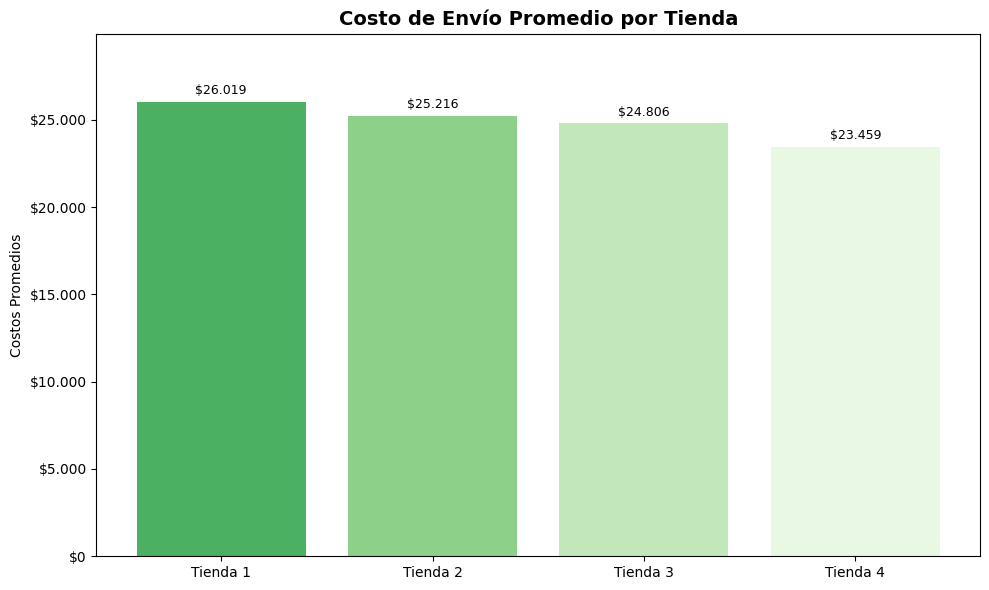

In [ ]:
# Calcular el costo de envío promedio para cada tienda
try:
    costo_prom_t1 = tienda1['Costo de envío'].mean()
    costo_prom_t2 = tienda2['Costo de envío'].mean()
    costo_prom_t3 = tienda3['Costo de envío'].mean()
    costo_prom_t4 = tienda4['Costo de envío'].mean()
except KeyError:
    print("Error: Verifica que la columna 'Costo de envío' exista en todos los DataFrames.")
    costo_prom_t1, costo_prom_t2, costo_prom_t3, costo_prom_t4 = pd.NA, pd.NA, pd.NA, pd.NA
except TypeError:
    print("Error: Verifica que la columna 'Costo de envío' sea numérica.")
    costo_prom_t1, costo_prom_t2, costo_prom_t3, costo_prom_t4 = pd.NA, pd.NA, pd.NA, pd.NA


# Preparación de datos para gráfico comparativo

# 1. Crear listas con nombres y los promedios calculados
store_names = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
costos_promedio = [costo_prom_t1, costo_prom_t2, costo_prom_t3, costo_prom_t4]

# 2. Filtrar datos no válidos (NaN) para graficar
valid_indices_costo = [i for i, x in enumerate(costos_promedio) if pd.notna(x)]
nombres_validos_costo = [store_names[i] for i in valid_indices_costo]
costos_validos = [costos_promedio[i] for i in valid_indices_costo]

# Funciones de utilidad

# Función manual para formatear números con puntos
def format_con_puntos(numero):
    """Formatea un número entero o flotante como string con puntos para miles."""
    try:
        s = f"{numero:.0f}"
        n = len(s)
        if n <= 3:
            return s
        resultado = ""
        for i, digito in enumerate(reversed(s)):
            if i > 0 and i % 3 == 0:
                resultado += "."
            resultado += digito
        return resultado[::-1]
    except (TypeError, ValueError):
         return str(numero)

# Función de formato específica para eje y
def formato_moneda_completo(valor, pos):
    """Toma un valor numérico y devuelve el string formateado $XX.XXX"""
    numero_formateado = format_con_puntos(valor)
    return f"${numero_formateado}"


# Visualización costo de envío promedio por tienda

# 1. Crear figura y ejes para el gráfico comparativo
fig_envio, ax_envio = plt.subplots(figsize=(10, 6))

# 2. Lógica principal del gráfico

    # 2.1 Verificar si hay datos válidos
if not nombres_validos_costo:
    ax_envio.text(0.5, 0.5, 'Sin datos válidos', ha='center', va='center', transform=ax_envio.transAxes)
    ax_envio.set_title('Costo de Envío Promedio por Tienda', fontsize=14, fontweight='bold')
else:

    # 2.2 Definir colores
    num_tiendas_validas = len(nombres_validos_costo)
    if num_tiendas_validas > 0:
      colores = plt.cm.Greens_r(np.linspace(0.4, 0.9, num_tiendas_validas))
    else:
      colores = []

    # 2.3 Crear gráfico de barras
    ax_envio.bar(nombres_validos_costo, costos_validos, color=colores)

    # 2.4 Aplicar formato y títulos
    ax_envio.set_title("Costo de Envío Promedio por Tienda", fontsize=14, fontweight='bold')
    ax_envio.set_ylabel("Costos Promedios")
    ax_envio.tick_params(axis='x', rotation=0, labelsize=10) # Sin rotación

    # Aplicar el formateador al eje y
    ax_envio.yaxis.set_major_formatter(FuncFormatter(formato_moneda_completo))

    # 2.5 Añadir etiquetas de valor
    if costos_validos:
        max_costo = max(costos_validos)
        for i, v in enumerate(costos_validos):
            texto_costo = formato_moneda_completo(v, None)
            ax_envio.text(i, v + max_costo*0.01, texto_costo, ha='center', va='bottom', fontsize=9)

    # 2.6 Ajustar límites eje y
    if costos_validos:
      ax_envio.set_ylim(0, max(costos_validos) * 1.15)
    else:
      ax_envio.set_ylim(0, 1)

# 3. Ajustar diseño general
plt.tight_layout()

# 4. Mostrar gráfica
plt.show()

Notas del Envío promedio por tienda:


-Envios Totales:


El costo de envío promedio general, considerando las cuatro tiendas, es de aproximadamente $24.875 de dolares (promedio de USD 26.019, USD 25.216, USD 24.806 y USD 23.459)


-Ranking por Tienda basado en costo de envío promedio:


1°) Tienda 1: Lidera con el costo de envío promedio más alto USD 26.019

2°) Tienda 2: Sigue con un costo promedio de USD 25.216

3°) Tienda 3: Ocupa el tercer lugar con USD 24.806

4°) Tienda 4: Registra el costo de envío promedio más bajo con USD 23.459


-Diferencias Notables:


Se observa una tendencia decreciente en el costo de envío promedio desde la Tienda 1 hasta la Tienda 4. La diferencia entre la tienda con el costo más alto, la Tienda 1 y la de costo más bajo, la Tienda 4 es de aproximadamente de USD 2.560 dolares. Si bien hay una clara jerarquía, las diferencias entre tiendas consecutivas no son drásticas, sugiriendo políticas de envío o destinos con costos relativamente escalonados entre las tiendas


#6. ¡Extra! Análisis del desempeño geográfico:

Esta actividad es un extra, por lo tanto es OPCIONAL.

En este extra, tendrás el desafío de explorar las coordenadas geográficas de los datos de ventas e identificar patrones relacionados con la ubicación de las compras. Al utilizar las columnas de latitud y longitud, puede generar visualizaciones para comprender cómo varían las ventas según la ubicación geográfica.

Desafío:

Utilice los datos de latitud (lat) y longitud (lon) para mapear las ventas de cada tienda y analizar la distribución geográfica de los productos vendidos.

Genere gráficos de dispersión o mapas de calor (Heatmaps) para visualizar datos e identificar áreas con la mayor concentración de ventas.

Explore si algunas tiendas tienen un rendimiento superior o inferior al esperado en determinadas regiones e identifique si existen patrones geográficos que puedan influir en el rendimiento de las tiendas.

Sugerencias:

Puede utilizar la biblioteca Matplotlib para gráficos de dispersión o incluso integrarla con otras bibliotecas como Folium para generar mapas interactivos si desea ir más allá.

Analice cómo las variables geográficas influyen en los ingresos y las calificaciones de las tiendas.

--- Generando Heatmap: Tienda 1 ---


--- Heatmap Tienda 1 mostrado arriba ---
------------------------------
--- Generando Heatmap: Tienda 2 ---


--- Heatmap Tienda 2 mostrado arriba ---
------------------------------
--- Generando Heatmap: Tienda 3 ---


--- Heatmap Tienda 3 mostrado arriba ---
------------------------------
--- Generando Heatmap: Tienda 4 ---


--- Heatmap Tienda 4 mostrado arriba ---
------------------------------


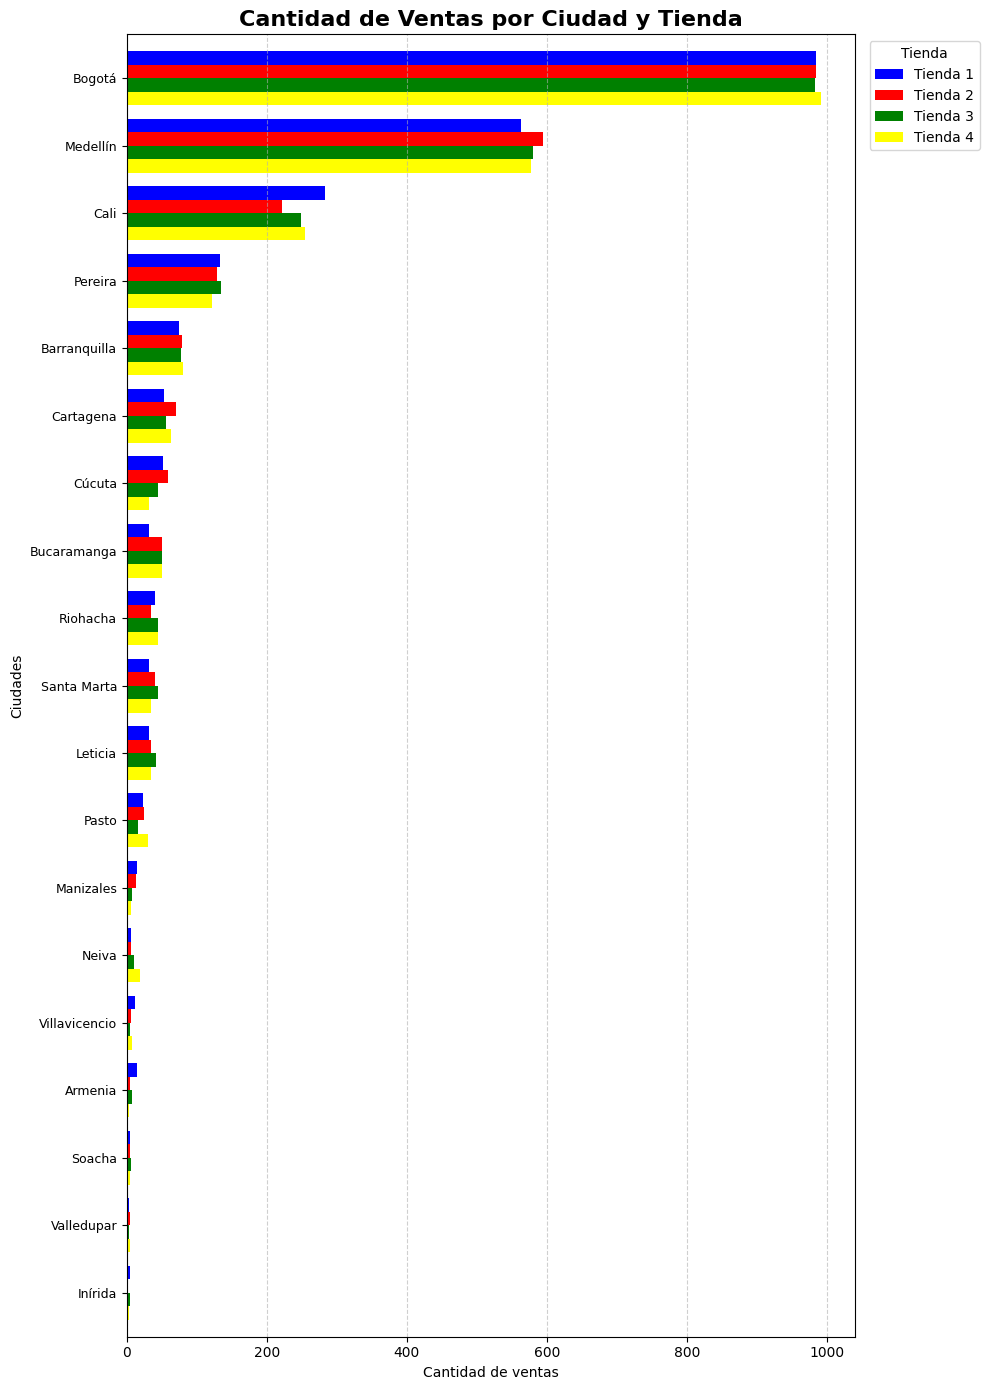

Tabla de ventas por ciudad y tienda
               Tienda 1  Tienda 2  Tienda 3  Tienda 4  Total
Bogotá              984       985       983       991   3943
Medellín            563       594       580       577   2314
Cali                283       222       248       254   1007
Pereira             133       128       134       122    517
Barranquilla         75        78        77        80    310
Cartagena            53        70        56        63    242
Cúcuta               51        59        44        32    186
Bucaramanga          31        50        50        50    181
Riohacha             40        35        44        44    163
Santa Marta          32        40        44        35    151
Leticia              32        34        41        35    142
Pasto                23        25        16        30     94
Manizales            15        13         7         6     41
Neiva                 6         6        10        18     40
Villavicencio        11         6         5      

In [ ]:
# Crear y preparar el dataframe combinado df_geo
try:
    # Añadir columna tienda a cada dataframe original
    tienda1['Tienda'] = 'Tienda 1'
    tienda2['Tienda'] = 'Tienda 2'
    tienda3['Tienda'] = 'Tienda 3'
    tienda4['Tienda'] = 'Tienda 4'

    # Combinar los dataframes
    df_geo = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

    # Convertir lat/lon a numérico y eliminar filas con NaNs en esas columnas
    df_geo['lat'] = pd.to_numeric(df_geo['lat'], errors='coerce')
    df_geo['lon'] = pd.to_numeric(df_geo['lon'], errors='coerce')
    rows_before_drop = len(df_geo)
    df_geo.dropna(subset=['lat', 'lon'], inplace=True)
    rows_after_drop = len(df_geo)
    rows_dropped = rows_before_drop - rows_after_drop
except NameError:
    print("ERROR: Asegúrate de que las variables tienda1, tienda2, etc., estén definidas.")
    print("Ejecuta primero la celda que carga los datos con pd.read_csv.")
    df_geo = None
except KeyError as e:
    print(f"ERROR: Falta la columna {e} en alguno de los DataFrames originales.")
    df_geo = None
except Exception as e:
    print(f"Ocurrió un error inesperado preparando df_geo: {e}")
    df_geo = None

# Fin preparación df_geo


# Visualización geográfica

# 1. Definir configuración del mapa
store_names = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
latitud_centro = 4.5709
longitud_centro = -74.2973
zoom_inicial = 5

# 2. Bucle para crear y mostrar un mapa para cada tienda
for i, nombre_tienda in enumerate(store_names):
    print(f"--- Generando Heatmap: {nombre_tienda} ---")

    # 2.1 Filtrar datos de la tienda actual
    tienda_actual = df_geo[df_geo['Tienda'] == nombre_tienda].copy()

    # 2.2 Verificar si hay datos válidos para graficar
    if tienda_actual.empty or 'lon' not in tienda_actual.columns or 'lat' not in tienda_actual.columns:
        print(f"Sin datos geográficos válidos para {nombre_tienda}.")
        continue

    # 2.3 Preparar datos para heatmap
    datos_heatmap = tienda_actual[['lat', 'lon']].values.tolist()

    # 2.4 Crear mapa base folium para esta tienda
    mapa_tienda = folium.Map(location=[latitud_centro, longitud_centro], zoom_start=zoom_inicial, tiles="CartoDB positron")

    # 2.5 Añadir capa heatmap
    HeatMap(data=datos_heatmap,
            name=f"Ventas {nombre_tienda}",
            radius=12,
            blur=8
           ).add_to(mapa_tienda)

    # 2.6 Añadir título a los mapas
    ciudades_unicas = tienda_actual[['lat', 'lon', 'Lugar de Compra']].drop_duplicates().head(20)
    for idx, row in ciudades_unicas.iterrows():
       folium.Marker(location=[row['lat'], row['lon']], popup=f"{row['Lugar de Compra']}").add_to(mapa_tienda)

    # 2.7 Mostrar mapa
    display(mapa_tienda)
    print(f"--- Heatmap {nombre_tienda} mostrado arriba ---")
    print("-" * 30)

# Fin análisis geográfico con heatmaps


# Ordenar ciudades por total de ventas
try:
    ventas_ciudad_tienda = df_geo.groupby(['Lugar de Compra', 'Tienda']).size()
    ventas_ciudad_tienda_pivot = ventas_ciudad_tienda.unstack(level='Tienda', fill_value=0)
    ventas_ciudad_tienda_pivot['Total'] = ventas_ciudad_tienda_pivot.sum(axis=1)
    ventas_ciudad_tienda_pivot = ventas_ciudad_tienda_pivot[ventas_ciudad_tienda_pivot['Total'] > 0]
    ventas_ciudad_tienda_pivot = ventas_ciudad_tienda_pivot.sort_values('Total', ascending=True)
    ventas_ciudad_tienda_pivot = ventas_ciudad_tienda_pivot.drop(columns='Total')
except KeyError as e:
    print(f"ERROR: Falta la columna {e} en df_geo. Asegúrate de tener 'Lugar de Compra' y 'Tienda'.")
    ventas_ciudad_tienda_pivot = pd.DataFrame()
except NameError:
     print("ERROR: No se encontró el DataFrame 'df_geo'. Ejecuta la celda de preparación.")
     ventas_ciudad_tienda_pivot = pd.DataFrame()
except Exception as e:
     print(f"Error inesperado al agrupar datos: {e}")
     ventas_ciudad_tienda_pivot = pd.DataFrame()

# Visualización barras horizontales agrupadas
if ventas_ciudad_tienda_pivot.empty:
    print("No se pueden generar gráficos sin datos agrupados válidos.")
else:

# 1. Definir colores específicos por tienda
    colores_tienda_map = {
        'Tienda 1': 'blue',
        'Tienda 2': 'red',
        'Tienda 3': 'green',
        'Tienda 4': 'yellow'
    }

    # 1.1 Definir el orden deseado de columnas
    column_order = ['Tienda 4', 'Tienda 3', 'Tienda 2', 'Tienda 1']
    column_order_present = [col for col in column_order if col in ventas_ciudad_tienda_pivot.columns]

    # 1.2 Reordenar el dataframe justo antes de graficar
    ventas_plot_reordenado = ventas_ciudad_tienda_pivot[column_order_present]

    # 1.3 Crear la lista de colores en el nuevo orden de las columnas
    colores_a_usar_reordenado = [colores_tienda_map.get(tienda, '#CCCCCC') for tienda in column_order_present]

# 2. Crear gráfico de barras horizontales agrupadas usando el dataframe ya ordenado
    ax = ventas_plot_reordenado.plot(
        kind='barh',
        figsize=(10, 14),
        color=colores_a_usar_reordenado,
        width=0.8,
        stacked=False
    )

# 3. Ajustar formato y títulos
    ax.set_title('Cantidad de Ventas por Ciudad y Tienda', fontsize=16, fontweight='bold')
    ax.set_xlabel('Cantidad de ventas')
    ax.set_ylabel('Ciudades')
    ax.tick_params(axis='y', labelsize=9)
    ax.grid(True, axis='x', linestyle='--', alpha=0.6)

# 4. Añadir leyenda
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(list(reversed(handles)), list(reversed(labels)), title='Tienda', bbox_to_anchor=(1.01, 1), loc='upper left')

# 5. Ajustar diseño y mostrar gráfica
    plt.tight_layout()
    plt.show()

# Fin análisis comparativo ciudad/tienda


#Tabla de ventas por ciudad y tienda lista:
print("Tabla de ventas por ciudad y tienda")
try:
    # Agrupar por ciudad y tienda contar el número de filas
    ventas_ciudad_tienda = df_geo.groupby(['Lugar de Compra', 'Tienda']).size()

    # Reorganizar para tener ciudades como índice y tiendas como columnas
    ventas_detalle_ciudad_tienda = ventas_ciudad_tienda.unstack(level='Tienda', fill_value=0)

    # Ordenar por total de ventas descendente
    ventas_detalle_ciudad_tienda['Total'] = ventas_detalle_ciudad_tienda.sum(axis=1)
    ventas_detalle_ciudad_tienda = ventas_detalle_ciudad_tienda.sort_values('Total', ascending=False)

    # Eliminar nombres de índice y columnas
    ventas_detalle_ciudad_tienda.index.name = None
    ventas_detalle_ciudad_tienda.columns.name = None
    print(ventas_detalle_ciudad_tienda)
except NameError:
    print("\nERROR: No se encontró el DataFrame 'df_geo'. Ejecuta la celda de preparación.")
except KeyError as e:
    print(f"\nERROR: Falta la columna {e}. Asegúrate de tener 'Lugar de Compra' y 'Tienda'.")
except Exception as e:
    print(f"\nError inesperado al calcular la tabla: {e}")

# Fin tabla de ventas por ciudad y tienda

Influencia Geográfica en Rendimiento


Influencia en Ingresos:


- Tienda 1: Aunque registra el mayor ingreso total, su liderazgo no proviene de dominar los mercados más grandes (es superada ligeramente en Bogotá por T4 y T2, y es la más baja en Medellín con 563 ventas). Su fortaleza radica en ser la tienda con el mayor volumen de ventas en Cali (283) y mantener una presencia consistente, aunque no siempre líder, en casi todas las ciudades de menor tamaño listadas (ej: Pereira 133, Cúcuta 51, Armenia 14, Inírida 5), sumando un volumen significativo a través de esta amplia cobertura geográfica


- Tienda 2: Su segundo lugar en ingresos se explica por su excelente desempeño en los dos principales mercados: es la tienda con más ventas en Medellín (594) y la segunda en Bogotá (985). También lidera en Cartagena (70) y Cúcuta (59). Su fuerte concentración en estos puntos de alto volumen compensa su menor presencia en las ciudades más pequeñas


- Tienda 3: Similar a Tienda 2, su tercer puesto en ingresos se basa en un rendimiento sólido en Bogotá (983) y Medellín (580). Logra liderar marginalmente en Pereira (134) y Neiva (10). Al igual que la Tienda 2, su impacto en las ciudades más pequeñas es menor que el de la Tienda 1


- Tienda 4: A pesar de tener el mayor número de ventas en Bogotá (991) y Barranquilla (80), su cuarto lugar en ingresos totales sugiere que su rendimiento comparativamente más bajo en el segundo mercado más grande (Medellín, 577) y su desempeño variable sin claro liderazgo en ciudades medianas (ej: Cali 254, Pereira 122, Cartagena 63) limitan su facturación general


Influencia en Calificaciones:


La ubicación geográfica no parece ser un factor determinante para las calificaciones promedio. Como se observó antes, todas las tiendas tienen calificaciones muy similares (entre 3.98 y 4.05). Los datos numéricos por ciudad no revelan un patrón que conecte altos volúmenes de venta en ciertas ciudades (ej: Bogotá, Medellín) o el liderazgo en ciudades específicas con una calificación promedio consistentemente más alta o más baja. Esto refuerza la idea de que la satisfacción del cliente es homogénea y probablemente depende más de otros factores (calidad del producto, políticas generales, experiencia de compra global, etc.)

#7. Informe Final#

1. Introducción

Se realizó un análisis comparativo de Tienda 1, Tienda 2, Tienda 3 y Tienda 4, evaluando múltiples factores de rendimiento: ingresos totales, ventas por categoría, calificaciones promedio de clientes, rendimiento de productos individuales (más y menos vendidos, y un sistema de puntuación derivado), costo de envío promedio y distribución geográfica de las ventas. El objetivo es identificar la tienda cuyo perfil general la convierte en la candidata más lógica para una desinversión o venta, considerando tanto fortalezas como debilidades.

2. Resumen Comparativo por Tienda

Tienda 1: Es la líder indiscutible en ingresos totales (aprox. USD 1,151M), lográndolo a través de una amplia cobertura geográfica y buen desempeño en ciudades medianas/pequeñas. Sin embargo, presenta la calificación promedio más baja (3.98, aunque la diferencia es mínima), el costo de envío promedio más alto (USD 26.019) y el peor puntaje en el ranking de productos (-9), indicando una posible acumulación de inventario de baja rotación o "flops".

Tienda 2: Ocupa el segundo lugar en ingresos (aprox. USD 1,116M) y calificaciones (4.04), sustentado por un fuerte desempeño en los mercados más grandes (Bogotá y Medellín) y por tener los productos individuales más vendidos (1° y 2° lugar). Obtuvo el mejor puntaje en el ranking de productos (-1), reflejando el éxito de sus "hits". Sus puntos débiles son tener también el producto menos vendido absoluto y el segundo costo de envío más alto (USD 25.216).

Tienda 3: Presenta la calificación promedio más alta (4.05), costos de envío competitivos (USD 24.806 - 3° lugar) y un puntaje de productos aceptable (-6) al evitar los productos de ventas extremadamente bajas. Sin embargo, ocupa el tercer lugar en ingresos (aprox. USD $1,098M) y es la única sin productos en el Top 5 de más vendidos, dependiendo fuertemente de Bogotá y Medellín.

Tienda 4: Registra los ingresos más bajos (aprox. USD $1,038M) y un rendimiento geográfico generalmente inferior, aunque lidera puntualmente en Bogotá y Barranquilla. Sus puntos fuertes son el costo de envío promedio más bajo (USD 23.459), una calificación aceptable (4.00 - 3° lugar) y un buen puntaje de productos (-4) gracias a tener artículos en el 2° y 5° puesto de los más vendidos.

3. Análisis para la Decisión de Venta

La decisión sobre qué tienda vender depende de la estrategia a seguir:

Vender la de menor rendimiento (Tienda 4) liberaría recursos, pero se perdería la operación con menores costos de envío.

Vender la más estable y con mejor satisfacción (Tienda 3) podría ser un error si se valora la lealtad del cliente y el bajo riesgo, aunque carece de productos estrella.

Vender la más dinámica (Tienda 2) sacrificaría el mayor potencial de "hits" y una buena combinación de ingresos/satisfacción.

Vender la líder en ingresos (Tienda 1) podría parecer contraintuitivo, pero permite capitalizar su valor actual mientras se evitan posibles problemas futuros derivados de sus altos costos de envío, baja eficiencia de inventario (peor puntaje de productos) y la calificación marginalmente inferior.

4. Conclusión

Considerando todos los factores, la venta se inclina hacia la Tienda 1.

Justificación: Si bien es la que genera mayores ingresos actualmente, también presenta las señales de alerta más significativas en términos de eficiencia operativa y satisfacción relativa. Su alto costo de envío, su bajo rendimiento en el puntaje de productos (sugiriendo problemas de inventario o marketing para una parte de su catálogo) y su calificación, aunque alta, siendo la más baja del grupo, indican áreas que requerirían inversión y esfuerzo para optimizar. Venderla ahora permitiría al Sr. Juan obtener potencialmente el mayor valor por su activo principal, mientras concentra recursos en las otras tiendas (especialmente la Tienda 2 con su dinamismo y la Tienda 3 con su estabilidad y satisfacción) que, aunque facturan menos, presentan perfiles operativos quizás más equilibrados o con "problemas" más acotados. Vender la Tienda 1 es una decisión estratégica para capitalizar su posición actual antes de que sus debilidades operativas puedan erosionar su valor.